<a href="https://colab.research.google.com/github/addy4/MR-eA-solver/blob/main/CVRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer: 25, Demand: 35
Customer: 47, Demand: 43
Customer: 36, Demand: 53
Customer: 21, Demand: 59
Customer: 42, Demand: 67
Customer: 23, Demand: 62
Customer: 16, Demand: 17
Customer: 6, Demand: 58
Customer: 13, Demand: 86
Sorted Customers: [16, 25, 47, 36, 6, 21, 23, 42, 13]
Tour for vehicle 0 : [1, 25, 47, 36, 21, 42, 23, 16, 6, 13]
Customer: 67, Demand: 46
Customer: 85, Demand: 43
Customer: 91, Demand: 55
Customer: 77, Demand: 6
Customer: 56, Demand: 72
Customer: 70, Demand: 28
Customer: 75, Demand: 73
Customer: 17, Demand: 97
Customer: 10, Demand: 62
Customer: 93, Demand: 68
Customer: 55, Demand: 67
Customer: 69, Demand: 52
Customer: 87, Demand: 73
Customer: 2, Demand: 38
Customer: 71, Demand: 96
Customer: 14, Demand: 46
Sorted Customers: [77, 70, 2, 85, 14, 67, 69, 91, 10, 55, 93, 56, 87, 75, 71, 17]
Tour for vehicle 1 : [1, 67, 85, 91, 77, 56, 70, 75, 17, 10, 93, 55, 69, 87, 2, 71, 14]
Customer: 7, Demand: 54
Customer: 38, Demand: 70
Customer: 37, Demand: 97
Customer: 30, Demand

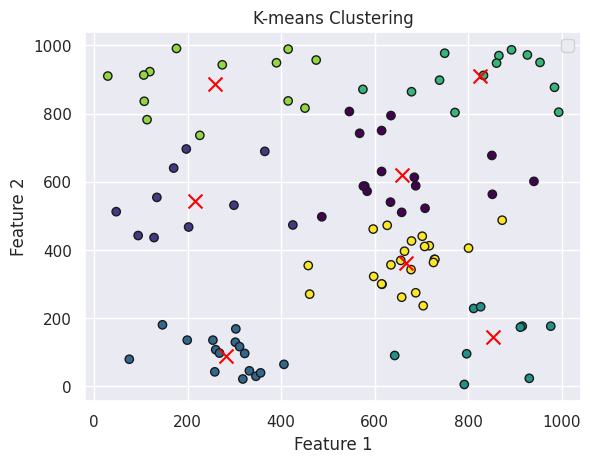

107
101


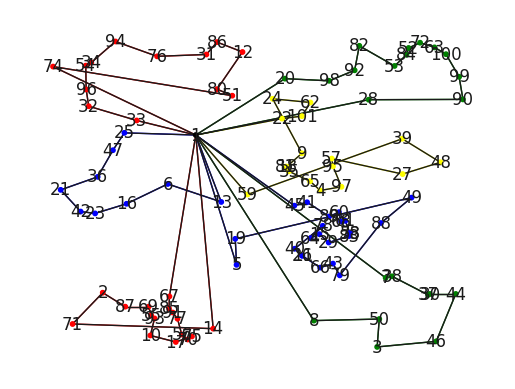

In [ ]:
import sys
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import networkx as nx
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# Custom Ordered List (Maintain Order)
class OrderedList:
    def __init__(self) -> None:
        self.sortedList = []

    def addToSortedList(self, customer_id, customer_demands):
        insertionPoint = 0
        #print('customer ID: {}, demand: {}'.format(customer_id,customer_demands[customer_id-1]))
        for existing_customer_id in self.sortedList:
            if(customer_demands[existing_customer_id - 1] < customer_demands[customer_id - 1]):
                insertionPoint = insertionPoint + 1
            else:
                break
        self.sortedList.insert(insertionPoint, customer_id) # index of worst customer point

# Vehicle Tour
class VehicleTour:
    def __init__(self, tourForVehicle : list, totalWeight : int, customersSortedByDemand : list) -> None:
        self.tourForVehicle = tourForVehicle
        self.totalWeight = totalWeight
        self.customersSortedByDemand = customersSortedByDemand

# Individual
class Individual:
    def __init__(self, clusterFormations, tourTSPForEachVehicle, VehicleTourList) -> None:
        self.clusterSet = clusterFormations
        self.tourForEachVehicle = tourTSPForEachVehicle # List of vehicle tours [int : customer ids]
        self.VehicleTourList = VehicleTourList

    def getFitness(self):
        pass

    def getLoad(self, customer_demands):
        self.vehicleLoad = []
        vehicle = 0
        for vehicleTour in self.tourForEachVehicle:
            InitLoad = 0
            for demandPoints in vehicleTour:
                if(demandPoints == 1):
                    pass
                else:
                    InitLoad = InitLoad + customer_demands[demandPoints - 1]
            self.vehicleLoad.append(InitLoad)
            vehicle = vehicle + 1

        vehicle = 0
        for loads in self.vehicleLoad:
            print("{}: {}".format(vehicle, loads))
            vehicle = vehicle + 1

    def sortVehiclesByWeight():
      # sort vehicles/tours by weight
      # return the sorted vehicles to fixIndi
      pass

    def fixIndi():
        # eject heaviest customers until vehicle's capacity is less than capacity. (let them float)
        ### convert customer list to set.
        ### remove customer by customer ID simply.
        # attach floating customers to vehicle's having less weight.
        pass


# Debugger
class Debug:
    def __init__(self) -> None:
        pass

    @staticmethod
    def showList(attr, data):
        print("{0} : {1}".format(attr, data))

    @staticmethod
    def iterateFormations(cluster_formations, customer_coordinates):
        for label in cluster_formations:
            print("##########################################")
            for ind in cluster_formations[label]:
                print(customer_coordinates[ind - 1])

    @staticmethod
    def SaveToursToFile(Indi : Individual):
        handler = open("cvrp-X-n101-k25-solutions-routes.txt", "w")

        i = 1
        for tour in Indi.tourForEachVehicle:
            rt = 'Route #{}:'.format(i)
            for j in tour:
                if j == 1:
                    continue
                rt = rt + ' '
                rt = rt + str(j-1) # Because, evaluator uses JSON file where max customer ID is 100 not 101!
            handler.write(rt)
            if i == len(Indi.tourForEachVehicle):
                break
            handler.write('\n')
            i = i + 1

# Displayer
class Display:
    def __init__(self) -> None:
        pass

    @staticmethod
    def displayCluster(customer_coordinates, cluster_labels, cluster_centers):
        customer_coordinates = np.array(customer_coordinates)
        plt.scatter(customer_coordinates[:, 0], customer_coordinates[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=100)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-means Clustering')
        plt.legend()
        plt.show()

    @staticmethod
    def displayTours(Ind : Individual, customer_ids : list, customer_coordinates : list):
        # Initialize
        sns.set_theme()
        color_map = []
        ed_color_map = []
        G = nx.Graph()

        # Edges
        edges = []
        cl = 0
        colors_there = ['blue', 'red', 'green', 'yellow']
        for tour in Ind.tourForEachVehicle:
            color_to_append = colors_there[cl]
            for i in range(len(tour) - 1):
                edges.append((tour[i], tour[i + 1]))
                G.add_node(tour[i+1], pos=(customer_coordinates[tour[i+1]-1]))
                color_map.append(color_to_append)
                ed_color_map.append(color_to_append)
            edges.append((tour[len(tour) - 1], tour[0]))
            ed_color_map.append(color_to_append)
            cl = (cl + 1) % 4

        G.add_node(tour[0], pos=(customer_coordinates[tour[0]-1]))
        color_map.append('black')

        # Coordinates
        # for i in range(len(customer_ids)):
        #    G.add_node(customer_ids[i], pos=(customer_coordinates[i]))

        position_array = []
        for node in sorted(G):
            position_array.append(G.nodes[node]["pos"])

        distances = squareform(pdist(np.array(position_array)))

        for u, v in edges:
            G.add_edge(u, v, weight=np.round(distances[u - 1][v - 1] * 2, decimals=1))

        T = nx.minimum_spanning_tree(G, algorithm='kruskal')

        node_pos = nx.get_node_attributes(G, 'pos')
        edge_weight = nx.get_edge_attributes(G, 'weight')
        red_edges = T.edges()
        node_col = ['white']
        # If the edge is in the shortest path set it to red, else set it to white color
        edge_col = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

        print(G.size())
        print(len(color_map))

        nx.draw_networkx(G, node_pos, node_color=color_map, node_size=10, with_labels=False, edge_color=ed_color_map)

        # Draw the node labels
        nx.draw_networkx_labels(G, node_pos)

        nx.draw_networkx_edges(G, node_pos)

        # Draw the edge labels
        #nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_weight)

        # Remove the axis
        plt.axis('off')
        # Show the plot
        plt.show()


# Parse Input File
def parse_input_file(path = 'X-n101-k25.vrp'):
    customer_ids = []
    customer_coordinates = []
    customer_demands = []

    depart = 0

    #lines = sys.stdin.readlines()
    with open(path, 'r') as file:
      lines = file.readlines()

    curr_section_node_coords = False
    curr_section_demand = False
    curr_section_depot = False

    for line in lines:
        if line.startswith('NODE_COORD_SECTION'):
            curr_section_node_coords = True
            curr_section_demand = False
            curr_section_depot = False
            continue
        elif line.startswith('DEMAND_SECTION'):
            curr_section_node_coords = False
            curr_section_demand = True
            curr_section_depot = False
            continue
        elif line.startswith('DEPOT_SECTION'):
            curr_section_node_coords = False
            curr_section_demand = False
            curr_section_depot = True
            continue
        elif line.startswith('EOF'):
            break

        # Parse node coordinates section
        if curr_section_node_coords and line.strip() and not (curr_section_demand or curr_section_depot):
            parts = line.strip().split()
            node_id = int(parts[0])
            x_coord = float(parts[1])
            y_coord = float(parts[2])
            customer_ids.append(node_id)
            customer_coordinates.append((x_coord, y_coord))

        # Parse demand section
        if curr_section_demand and line.strip() and not (curr_section_node_coords or curr_section_depot):
            parts = line.strip().split()
            customer_id = int(parts[0])
            customer_demand = int(parts[1])
            customer_demands.append(customer_demand)

        # Parse DEPOT_SECTION
        if curr_section_depot and line.strip():
            depart = int(line.strip())

    return customer_ids, customer_coordinates, customer_demands, depart

# Obtain 2D Distance
def distance(x1, y1, x2, y2):
    return (y2 - y1)*(y2 - y1) + (x2 - x1)*(x2 - x1)

# Generate Distance Matrix
def gen_distance_grid(customer_ids, customer_coordinates):
    grid = []
    customer_coordinates = np.array(customer_coordinates)
    for i_customer in customer_ids:
        cols = []
        for j_customer in customer_ids:
            if i_customer == j_customer:
                cols.append(0)
            else:
                dval = distance(customer_coordinates[i_customer - 1, 0], customer_coordinates[i_customer - 1, 1], customer_coordinates[j_customer - 1, 0], customer_coordinates[j_customer - 1, 1])
                cols.append(dval)

        grid.append(cols)

    return grid


# Nearest Neighbour TSP Tour
def nearest_neighbor(customer_ids_in_formation, distances, customer_demands):
    sortedCustomers = OrderedList()
    unvisited = set(customer_ids_in_formation)
    current = customer_ids_in_formation[0]
    unvisited.remove(current)
    tourForVehicle = [current]
    totalWeight = 0
    while unvisited:
        # get nearest city
        next_city = min(unvisited, key=lambda customer_j: distances[current - 1][customer_j - 1])

        # process vehicle tour attrs
        totalWeight = totalWeight + customer_demands[next_city-1]
        tourForVehicle.append(next_city)

        # Print demand
        print('Customer: {}, Demand: {}'.format(next_city, customer_demands[next_city-1]))

        # remove above selected city from unvisited
        unvisited.remove(next_city)
        current = next_city

        # add customer ID to sortedCustomers
        sortedCustomers.addToSortedList(next_city, customer_demands)

    print("Sorted Customers: {}".format(sortedCustomers.sortedList))
    return tourForVehicle, totalWeight, sortedCustomers


# Create Individual
def create_individual(cluster_formations, distances, customer_demands):
    tspTourForVehicles = []
    vehicleTourList = []
    vehicle = 0
    for centre_label in cluster_formations:
        consideredPointsForTSP = []
        consideredPointsForTSP = cluster_formations[centre_label]
        consideredPointsForTSP.insert(0, 1) # depart point
        tspTourForSingleVehicle, totalWeight, sortedCustomers = nearest_neighbor(consideredPointsForTSP, distances, customer_demands)
        # Int List (Vehicle Tours)
        print("Tour for vehicle {} :".format(vehicle), tspTourForSingleVehicle)
        tspTourForVehicles.append(tspTourForSingleVehicle)
        # VehicleTourList
        vehicleTourList.append(VehicleTour(tspTourForSingleVehicle, totalWeight, sortedCustomers))
        vehicle = vehicle + 1
    return Individual(cluster_formations, tspTourForVehicles, vehicleTourList)


# Generate Cluster Formations
def get_cluster_formations(customer_ids, customer_coordinates, kval):

    # Convert to np.array
    customer_coordinates = np.array(customer_coordinates)

    # Generate some random data points for clustering
    np.random.seed(0)

    # Clusters
    k = kval

    # Initialize the KMeans model
    kmeans = MiniBatchKMeans(n_clusters=k)

    # Fit the model to the data
    kmeans.fit(customer_coordinates)

    # Get the cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Get cluster formations
    cluster_formations = {}

    # Enumerate & assign customer IDs group of similar labels
    for i, label in enumerate(cluster_labels):
        if label not in cluster_formations:
            cluster_formations[label] = []
        cluster_formations[label].append(customer_ids[i])

    return cluster_formations, cluster_labels, cluster_centers

# Parsed Input
customer_ids, customer_coordinates, customer_demands, depart = parse_input_file()

# Generate Cluster Formations (Dictionary -> Label : [Customer Coordinates])
cluster_formations, cluster_labels, cluster_centers = get_cluster_formations(customer_ids, customer_coordinates, 7)

# Generate Distance Matrix Using Cluster Formations
dgrid = gen_distance_grid(customer_ids, customer_coordinates)

# Create Ind
cluster_formations_copy = copy.deepcopy(cluster_formations) # because dictionary is a mutable object and gets modified when passed
Ind = create_individual(cluster_formations_copy, dgrid, customer_demands)
Ind.getLoad(customer_demands)

# Print Details
Debug.showList("Customer IDs", customer_ids)
Debug.showList("Customer Coordinates", customer_coordinates)
Debug.showList("Demands", customer_demands)
Debug.showList("Formations", cluster_formations)
Debug.iterateFormations(cluster_formations, customer_coordinates)
Debug.SaveToursToFile(Ind)

# Displayer
Display.displayCluster(customer_coordinates, cluster_labels, cluster_centers)
Display.displayTours(Ind, customer_ids, customer_coordinates)